# D2AM
pagi Feature engineering
siang Outliers ( kelasnya di jaikan persentasi jadi untuk yg bagian ga di pelajari oleh kelompomk di ulangin sendiri)

> ketika menjadi DS, waktu yg kita gunakan itu banyak di cleaning atau organize data 60%
> lama karena bnyk proses
    - cleaning duplicate?
    - missing?
    - handling missing?
    - analisis knp missing?
    - pada dunia nyata nanti, columns dan barisnya ada banyak sekali

> Feature engginering 
    - perubahan data/ feature agar bisa di olah ke model
        - teknik mengolah feature
    - Hyper parameter tunning - model akan melakukan looping sampai menemukan parameter optimal untuk pengerjaan

> Feature scaling - yg berbasis tree tidak perlu scaling
    - merubah data ke bentuk 0-1 misalnya data gaji yang range nya besar akan di rubah ke skala 0-1
    - ad beberapa algoritma yang tidak bisa perfome kalo belum di scaling
        -liniar regresion, logistik regresion , svr (pokony yg regresi)
    -scaling juga di bagi normal dan standar [disini](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
RMSE semakin kecil semakin bagus
Akurasi semakin besar semakin bagus

> under fiting vs over fiting
[disini](https://algorit.ma/blog/data-science/overfitting-underfitting/#:~:text=Apa%20Itu%20Underfitting%3F,atau%20mengklasifikasikan%20data%20point%20baru.)




> Variabel type
- Numerical
    - Discrette ->
    - Continous ->
- Categorical
    - nominal -> tidak punya urutan (gender)
    - ordinal -> kategori yang memiliki urutan (peringkat, pangkat)

In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #abaikan warning

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

In [2]:
# Load Titanic Dataset

data_titanic_ori = pd.read_csv('Titanic.csv')
data_titanic = data_titanic_ori.copy()
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Check Missing Values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Check Missing Values as Percentage to Total Data

data_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
# Load Mercedes-Benz Dataset

data_mercedes_ori = pd.read_csv('Mercedes-Benz.csv')
data_mercedes = data_mercedes_ori.copy()
data_mercedes.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# Load House Prices

data_house_prices_ori = pd.read_csv('House-Prices.csv')
data_house_prices = data_house_prices_ori.copy()
data_house_prices.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### A.3.1. Missing Completely at Random (MCAR)

In [7]:
# Check Missing Values for Variable `Embarked`

data_titanic[data_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Seperti yang Anda lihat di atas, Miss Icard dan Mrs Stones bepergian bersama. Hal ini terlihat dari jenis `Tiket` yang sama. Setelah mencari di internet, ditemukan bahwa Nona Icard adalah pembantu Nyonya Stone.

Kesimpulan dari nilai yang hilang untuk `Embarked` (berdasarkan asumsi pribadi):
* Tampaknya tidak ada indikasi bahwa informasi yang hilang dalam variabel Embarked bergantung pada variabel lain.
* Fakta bahwa para wanita ini selamat, berarti mereka mungkin dimintai informasi ini.
* Sangat mungkin kekurangan ini dihasilkan pada saat membangun kumpulan data dan oleh karena itu kita dapat berasumsi bahwa itu benar-benar acak.
* Kita dapat berasumsi bahwa probabilitas hilangnya data untuk 2 wanita ini sama dengan probabilitas hilangnya variabel ini untuk orang lain. Tentu saja ini akan sulit, jika mungkin sama sekali, untuk dibuktikan.

---
### A.3.2. Hilang Secara Acak (MAR)
Ciri-ciri Missing At Random (MAR) :
* **Probabilitas pengamatan yang hilang hanya bergantung pada informasi yang tersedia**.
* **Ada hubungan sistematis antara kecenderungan nilai yang hilang dan data yang diamati**.

---
### A.3.3. Hilang Tidak Secara Acak (MNAR)

Ciri-ciri Missing Not At Random (MNAR) :
* **Ada mekanisme atau alasan mengapa nilai yang hilang dimasukkan** dalam kumpulan data.
* Hilangnya mereka tergantung pada informasi yang tidak tercatat dalam dataset.
* Dalam situasi ini, kita akan **lebih baik menandai nilai-nilai yang hilang itu** untuk memprediksi target kita.

---
Mari kita asumsikan dataset Titanic :

> *Bagi banyak orang yang tidak selamat, `Umur` yang mereka miliki atau `Kabin` tempat mereka tinggal, tidak dapat ditentukan. Orang-orang yang selamat dapat dimintai informasi itu.*

Dari asumsi di atas, kami menyatakan bahwa hilangnya data `Usia` dan data `Kabin` adalah efek dari parameter `Bertahan`, yaitu `0` di mana penumpang tidak selamat.

Bisakah kita menyimpulkan ini dengan melihat data? *Kita bisa mengharapkan lebih banyak nilai yang hilang untuk orang-orang yang tidak bertahan hidup*.

In [8]:
# Create a variable that indicates whether the value of the variable `cabin` is missing or not
# buat kolom baru yang cabin new
data_titanic = data_titanic_ori.copy()
data_titanic['cabin_null'] = np.where(data_titanic.Cabin.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
# Grouping data by Survived vs Non-Survived and find nulls for cabin

print('Value Counts')
print(data_titanic.groupby(['Survived'])['cabin_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['cabin_null'].mean())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


Kami mengamati bahwa persentase nilai yang hilang lebih tinggi untuk orang yang tidak selamat (0,87), dibandingkan dengan orang yang selamat (0,60).
Temuan ini sejalan dengan asumsi kami bahwa data hilang karena setelah orang meninggal, informasi tidak dapat diambil.

Karena itu, untuk benar-benar mendukung apakah data yang hilang tidak secara acak, kita harus sangat mengenal cara data dikumpulkan. **Menganalisis kumpulan data, hanya dapat mengarahkan kita ke arah yang benar atau membantu kita membangun asumsi tetapi tidak akan memberikan bukti akhir mengapa data hilang.**

In [10]:
# Create a variable that indicates whether the value of the variable `Age` is missing or not

data_titanic['age_null'] = np.where(data_titanic.Age.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [11]:
# Grouping data by Survived vs Non-Survived and find nulls for `Age`

print('Value Counts')
print(data_titanic.groupby(['Survived'])['age_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['age_null'].mean())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


Sekali lagi, kami mengamati peningkatan data yang hilang untuk orang-orang yang tidak selamat dari tragedi itu. Oleh karena itu, analisis menyarankan:

**Ada kehilangan data yang sistematis: orang yang tidak selamat cenderung kehilangan lebih banyak informasi. Agaknya, metode yang dipilih untuk mengumpulkan informasi, berkontribusi pada pembuatan data yang hilang ini.**

------
## A.4. Analisis Kasus Lengkap CCA Complete Case Analysis

### Penjelasan

Analisis kasus lengkap (Complete-case analysis/CCA), juga disebut penghapusan kasus berdasarkan daftar, terdiri dari pengamatan sederhana **membuang** di mana nilai dalam salah satu variabel tidak ada. Analisis Kasus Lengkap berarti secara harfiah hanya menganalisis pengamatan yang ada informasinya di **semua** variabel (X).

CCA dapat diterapkan untuk kedua variabel kategorikal dan numerik.

**Asumsi** :
* **CCA berfungsi dengan baik saat data hilang sepenuhnya secara acak (MCAR).**
* Dalam hal ini, mengecualikan pengamatan dengan data yang hilang akan sama dengan mengecualikan beberapa pengamatan secara acak dari kumpulan data, mengingat data yang hilang benar-benar acak.
* Bekerja dengan baik jika jumlah total nilai yang hilang kecil.

**Keuntungan** :
* Mudah diterapkan
* Kumpulan data yang sama (walaupun kumpulan yang dikurangi) digunakan untuk semua analisis (tidak ada manipulasi data)
* Mempertahankan distribusi variabel (jika data adalah MCAR, maka distribusi variabel dari kumpulan data yang direduksi harus sesuai dengan distribusi dalam kumpulan data asli)

**Kekurangan** :
* Ini dapat mengecualikan sebagian besar sampel asli, yang berpotensi informatif untuk analisis
* CCA akan menjadi bias jika kasus lengkap secara sistematis berbeda dari sampel asli (misalnya ketika informasi yang hilang sebenarnya MAR (Missing At Random) atau MNAR (Missing Not At Random).

---
### Studi kasus

Mari kita lihat kumpulan data Titanic. Dengan asumsi bahwa nilai yang hilang adalah MCAR, yang mana bukan, jika kami memilih untuk menghapus semua pengamatan yang hilang, kami akan berakhir dengan kumpulan data yang sangat kecil, mengingat `Kabin` hilang untuk 77% pengamatan. Lihat di bawah.

In [12]:
# Count How Many Observations that We Would Drop

data_titanic = data_titanic_ori.copy()
print('Total passengers in the Titanic               : ', data_titanic.shape[0])
print('Total passengers with values in all variables : ', data_titanic.dropna().shape[0])
print('Percentage of data without missing values (%) : ', data_titanic.dropna().shape[0] / np.float(data_titanic.shape[0]) * 100)

Total passengers in the Titanic               :  891
Total passengers with values in all variables :  183
Percentage of data without missing values (%) :  20.53872053872054


Faktanya, kami memiliki informasi lengkap hanya untuk 20% dari pengamatan kami di kumpulan data Titanic. Dengan demikian, CCA tidak akan menjadi opsi untuk kumpulan data ini.

Namun, kita dapat memilih untuk:
* Ganti nilai yang hilang dalam variabel `Usia` dan `Kabin` dengan metode yang sesuai (seperti pada bagian berikutnya), dan
* Hapus pengamatan di mana `Embarked` tidak ada. Itu akan menghapus hanya 2 pengamatan dari seluruh dataset.

---
#### Distribusi kumpulan data setelah CCA

**Jika kami menghapus sejumlah besar pengamatan yang hilang, kumpulan data baru yang berisi orang-orang yang semua datanya tersedia, akan sangat berbeda dari grup aslinya.** Lihat di bawah:

In [13]:
# Check How Many Missing Values in Variable `Age` Only

data_titanic.Age.isnull().sum()

177

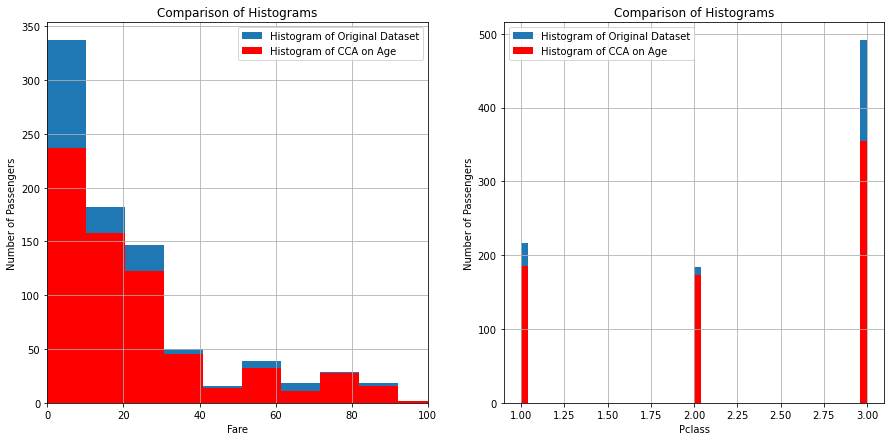

In [14]:
# Visualization of Histogram Differences between the Original Dataset and CCA for the Variable `Age` Only
# We Will Check the Effect of CCA Only to Variable `Fare` and `Pclass`

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

data_titanic.Fare.hist(bins=50, ax=ax[0], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax[0], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Age
ax[0].set_xlim(0,100)
ax[0].set_title('Comparison of Histograms')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(loc="upper right")

data_titanic.Pclass.hist(bins=50, ax=ax[1], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax[1], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Pclass
ax[1].set_title('Comparison of Histograms')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(loc="upper left")

Membandingkan histogram merah dan biru kita dapat mengamati bahwa distribusi seluruh dataset sebelum CCA tidak cocok dengan dataset setelah CCA. Ada banyak orang yang `Usia` hilang, yang membayar tarif lebih rendah untuk mendapatkan titanic.

Demikian pula, dataset asli menunjukkan proporsi yang lebih tinggi dari orang-orang yang bepergian di `Pclass` 3.

Mengingat bahwa distribusi variabel antara dataset asli dan yang setelah CCA tidak ekuivalen, CCA bukanlah pilihan yang baik.

---

# Saran

Dalam praktiknya, **CCA mungkin merupakan metode yang dapat diterima ketika jumlah informasi yang hilang sedikit. Sayangnya, tidak ada aturan praktis untuk menentukan seberapa banyak data yang hilang kecil atau dapat diabaikan.**

Dalam banyak kumpulan data kehidupan nyata, jumlah data yang hilang tidak pernah sedikit, dan oleh karena itu CCA biasanya tidak pernah menjadi pilihan.

Untuk membangun model pembelajaran mesin, sebaiknya ganti nilai yang hilang dengan salah satu metode. Namun, untuk analisis cepat, jika jumlah nilai yang hilang tidak besar, ini bisa menjadi pendekatan termudah dan tercepat.

## A.5. Rata-rata dan Median Imputasi

### Penjelasan

**Imputasi adalah tindakan mengganti data yang hilang dengan perkiraan statistik dari nilai yang hilang.** Tujuan dari teknik imputasi apa pun adalah untuk menghasilkan kumpulan data lengkap yang dapat digunakan untuk machine learning atau deep learning.

Imputasi mean/median terdiri dari mengganti semua kemunculan nilai yang hilang (NA) dalam suatu variabel dengan:
* **Mean** : jika variabel memiliki **distribusi Normal/Gaussian**.
* **Median** : jika variabel memiliki **distribusi miring**.

**Asumsi** : Data hilang sepenuhnya secara acak (MCAR).

Jika demikian halnya, kita dapat memikirkan untuk mengganti NA dengan variabel yang paling sering muncul, yang merupakan mean jika variabel memiliki distribusi Gaussian, atau median sebaliknya.

**Keuntungan** :
* Mudah diterapkan
* Cara cepat untuk mendapatkan kumpulan data lengkap

**Batasan** :
* Distorsi varians asli
  
  Saat mengganti NA dengan mean atau median, varians variabel akan terdistorsi jika jumlah NA besar terhadap jumlah total pengamatan (karena nilai yang diperhitungkan tidak berbeda dari mean atau satu sama lain). Oleh karena itu menyebabkan meremehkan varians.

* Distorsi kovarians/korelasi dengan variabel yang tersisa dalam kumpulan data

  Selain itu, perkiraan kovarians dan korelasi dengan variabel lain dalam kumpulan data juga dapat terpengaruh. Ini karena kita mungkin menghancurkan korelasi intrinsik karena mean/median yang sekarang menggantikan NA tidak akan mempertahankan hubungan dengan variabel yang tersisa.

**Imputasi harus dilakukan pada set pelatihan, dan kemudian disebarkan ke set pengujian.** Ini berarti bahwa mean/median yang akan digunakan untuk mengisi nilai yang hilang baik dalam rangkaian rangkaian maupun rangkaian pengujian, harus diekstraksi dari rangkaian rangkaian saja .


### Studi kasus

Kami akan menggunakan dataset Titanic untuk demonstrasi ini dan menggunakan Imputasi Rata-Rata/Median untuk menangani nilai yang hilang.

In [15]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, #ini adalah nilai ukuran tes sebesar 30% jadi data training sebesar 70%
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

Skewness :  0.3361317253050765


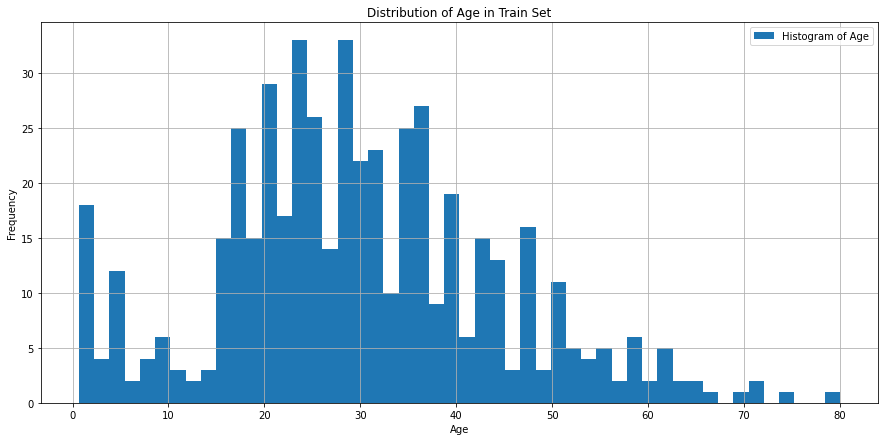

In [16]:
# Let's Check Type of Distirbution of Variable `Age`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of Age in Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_titanic.Age.skew())

In [17]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [18]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [19]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


---
#### Pengaruh Imputasi Rata-Rata/Median

Imputasi mean/median mengubah varians dari distribusi asli variabel

In [20]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', X_train_titanic['Age'].std())
print('Variance - After Mean Imputation   : ', X_train_titanic['Age_mean'].std())
print('Variance - After Median Imputation : ', X_train_titanic['Age_median'].std())

Variance - Orignal                 :  14.506993804588443
Variance - After Mean Imputation   :  13.019703562523883
Variance - After Median Imputation :  13.024746215318798


<Figure size 432x288 with 0 Axes>

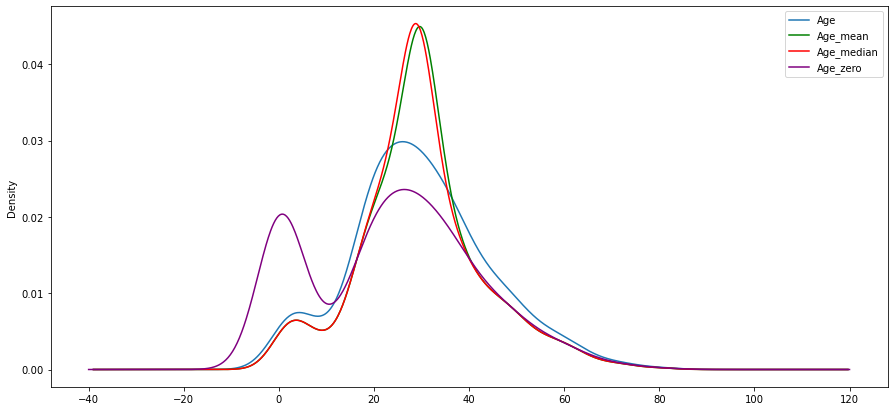

In [21]:
# Visualization Variable `Age` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
X_train_titanic.Age_zero.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Seperti disebutkan di atas, imputasi median mendistorsi distribusi asli dari variabel `Usia`. Variabel yang ditransformasi menunjukkan lebih banyak nilai di sekitar nilai mean/median.

Mengisi NA dengan `0` juga mendistorsi distribusi variabel asli, menghasilkan akumulasi nilai di sekitar `0`. Kita akan melihat di bagian berikutnya metode imputasi NA yang mempertahankan distribusi variabel.

In [22]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, and Median

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Train set zero imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test set zero imputation')
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



In [23]:
print('Average total survival :', X_train_titanic.Survived.mean())

print('\nAverage real survival of children : ', X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes : ', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with mean   : ', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average survival of children when using Age imputed with median : ', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average total survival : 0.3884430176565008

Average real survival of children :  0.5740740740740741
Average survival of children when using Age imputed with zeroes :  0.38857142857142857
Average survival of children when using Age imputed with mean   :  0.5740740740740741
Average survival of children when using Age imputed with median :  0.5740740740740741


Catatan evaluasi:
* **Anak-anak lebih mungkin selamat dari bencana** (0,57 untuk anak-anak vs 0,38 untuk seluruh Titanic). Dengan demikian, nilai `Usia` yang lebih kecil merupakan indikator kelangsungan hidup yang baik.

* **Saat kita mengganti NA dengan nol, kita menutupi kekuatan prediksi `Usia`.** Setelah nol imputasi, sepertinya anak-anak tidak memiliki peluang lebih besar untuk bertahan hidup, dan oleh karena itu model kehilangan kekuatan prediksi.

* Di sisi lain, **mengganti NA dengan mean/median, mempertahankan daya prediksi variabel Age**, karena nilai Age yang lebih kecil akan mendukung kelangsungan hidup.

---
### Saran

Penggantian NA dengan mean/median banyak digunakan dalam komunitas ilmu data dan dalam berbagai kompetisi ilmu data.

Biasanya, imputasi mean/median dilakukan bersama-sama dengan menambahkan variabel untuk menangkap pengamatan di mana data hilang, sehingga mencakup 2 sudut: jika data hilang sepenuhnya secara acak, ini akan dipertimbangkan oleh imputasi mean/median, dan jika bukan ini yang akan ditangkap oleh variabel tambahan.

Selain itu, kedua metode ini sangat mudah untuk diterapkan, dan oleh karena itu merupakan pilihan utama dalam kompetisi ilmu data.

## A.6. Imputasi Sampel Acak

### Penjelasan

**Sampling acak terdiri dari mengambil pengamatan acak dari kumpulan pengamatan variabel yang tersedia, dan menggunakan nilai yang diekstraksi secara acak untuk mengisi NA.**

Imputasi Sampel Acak pada prinsipnya mirip dengan imputasi rata-rata/median, dalam arti bahwa ini bertujuan untuk mempertahankan parameter statistik dari variabel asli, yang datanya hilang.

Dengan pengamatan sampling acak dari variabel untuk contoh-contoh di mana data tersedia, kami menjamin bahwa mean dan standar deviasi variabel dipertahankan.

**Asumsi :**
* Data Hilang Sepenuhnya Secara Acak (MCAR).

  Jika ini masalahnya, masuk akal untuk mengganti nilai yang hilang, dengan nilai yang diambil dari distribusi variabel asli.

* Dari sudut pandang probabilistik, nilai-nilai yang lebih sering (seperti mean atau median) akan lebih sering dipilih (karena ada lebih banyak dari mereka untuk dipilih), tetapi nilai-nilai lain yang lebih jarang akan dipilih juga. Dengan demikian, varians variabel dipertahankan.

  Alasannya adalah untuk mengganti populasi nilai yang hilang dengan populasi nilai dengan distribusi variabel yang sama.

**Keuntungan :**
* Mudah diterapkan
* Cara cepat untuk mendapatkan kumpulan data lengkap
* Mempertahankan varians variabel

**Batasan :** Keacakan

Keacakan mungkin tidak terlalu menjadi perhatian saat mengganti nilai yang hilang untuk kompetisi data, di mana seluruh kumpulan nilai yang hilang diganti sekali dan kemudian kumpulan data diberi skor dan itulah akhir masalahnya. Namun, dalam skenario bisnis situasinya sangat berbeda.

---
Bayangkan misalnya skenario Mercedes-Benz, di mana mereka mencoba **memprediksi berapa lama mobil tertentu akan berada di garasi sebelum lulus semua tes keamanan.**

Skenario:
* Hari ini, mereka menerima mobil dengan data yang hilang di beberapa variabel.
* Mereka menjalankan model pembelajaran mesin untuk memprediksi berapa lama mobil ini akan bertahan di garasi.
* Model menggantikan nilai yang hilang dengan sampel acak dari variabel dan kemudian menghasilkan perkiraan waktu.
* Besok, ketika mereka menjalankan model yang sama pada mobil yang sama dengan data yang sama, model akan secara acak memberikan nilai ke data yang hilang, yang mungkin sama atau tidak sama dengan yang dipilih sebelumnya,
* Perkiraan akhir waktu di garasi, mungkin sama atau tidak sama dengan yang diperoleh sehari sebelumnya.
* Karena data yang hilang diisi secara acak dengan nilai, 2 mobil, yang persis sama, mungkin berakhir dengan perkiraan waktu yang berbeda di garasi.

Ini mungkin terdengar sepele dan tidak penting, namun bisnis harus mengikuti berbagai peraturan, dan beberapa di antaranya mengharuskan **perlakuan yang sama diberikan untuk situasi yang sama**. Jadi, jika alih-alih mobil, ini adalah orang-orang yang *mengajukan pinjaman*, atau *orang-orang yang mencari pengobatan penyakit*, **model pembelajaran mesin pada akhirnya akan memberikan solusi yang berbeda kepada kandidat yang berada dalam kondisi yang sama. Dan ini tidak adil atau dapat diterima.**

Masih mungkin untuk mengganti data yang hilang dengan sampel acak, tetapi keacakan ini perlu dikendalikan, sehingga individu dalam situasi yang sama berakhir dengan skor yang sama dan oleh karena itu solusi.

Akhirnya, batasan potensial lain dari pengambilan sampel acak, mirip dengan mengganti dengan mean dan median, adalah bahwa perkiraan kovarians dan korelasi dengan variabel lain dalam kumpulan data juga dapat dihilangkan oleh keacakan.

---
### Case Study

In [24]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [25]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [26]:
# Function to Filling Missing Values with Zeroes and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample
  
  return df

In [27]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


#### Pengaruh Imputasi Sampel Acak

Pengambilan sampel acak mempertahankan distribusi asli variabel.

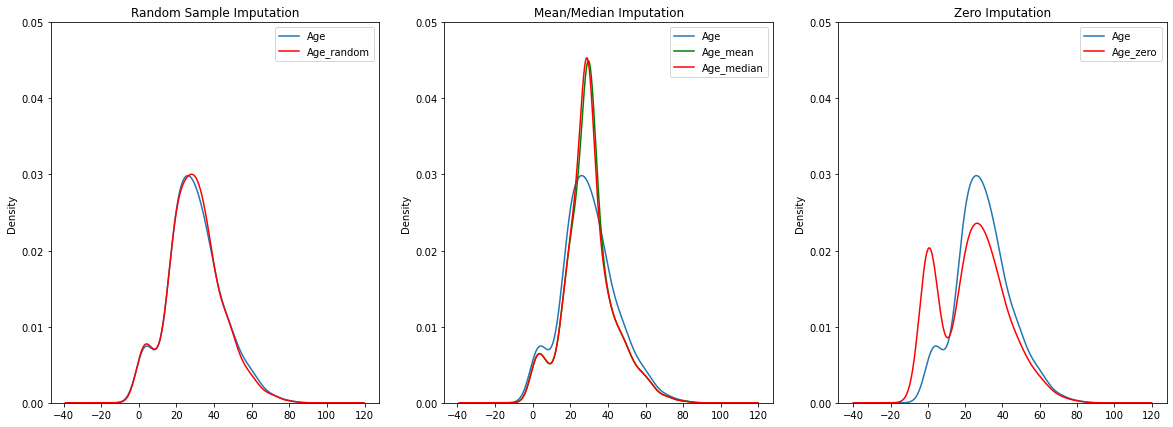

In [28]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax[0])
X_train_titanic.Age_random.plot(kind='kde', ax=ax[0], color='red')
lines, labels = ax[0].get_legend_handles_labels()
ax[0].set_ylim(0, 0.05)
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('Random Sample Imputation')
ax[0].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[1])
X_train_titanic.Age_mean.plot(kind='kde', ax=ax[1], color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax[1], color='red')
lines, labels = ax[1].get_legend_handles_labels()
ax[1].set_ylim(0, 0.05)
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('Mean/Median Imputation')
ax[1].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[2])
X_train_titanic.Age_zero.plot(kind='kde', ax=ax[2], color='red')
lines, labels = ax[2].get_legend_handles_labels()
ax[2].set_ylim(0, 0.05)
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('Zero Imputation')
ax[2].legend(loc="upper right")

Kita dapat melihat bahwa mengganti nilai yang hilang dengan sampel acak dari set pelatihan mempertahankan distribusi asli variabel. Sedangkan mengganti dengan mean, median, atau nol, mengubah distribusi.

In [29]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.754375



Kita dapat melihat bahwa mengganti NA dengan sampel acak dari kumpulan data, tidak berfungsi sebaik saat mengganti dengan median. **Namun, ini sepenuhnya karena keacakan.** Coba ubah seed (`random_sate`) dalam fungsi `impute_na`, lalu buat ulang `X_train_titanic` dan `X_test_titanic`, dan Anda akan melihat bagaimana performa modelnya bervariasi. Dalam beberapa kasus, kinerjanya akan lebih baik.

---
Jadi jika kinerja imputasi median vs imputasi sampel acak serupa, metode mana yang harus saya gunakan?

Memilih metode imputasi mana yang akan digunakan, akan tergantung pada berbagai hal:
* Apakah Anda ingin **mempertahankan distribusi** variabel?
* Apakah Anda bersedia **menerima elemen keacakan** dalam metode imputasi Anda?
* **Apa tujuan Anda?** Apakah Anda ingin memenangkan kompetisi data? atau untuk membuat keputusan yang didorong oleh bisnis?
* Anda harus ingat bahwa keacakan dapat **mengakibatkan skor yang berbeda** ditempatkan pada pengamatan yang sama.

**Tidak ada jawaban 'benar' untuk metode imputasi mana yang dapat Anda gunakan**, ini lebih bergantung pada apa yang ingin Anda capai.


---
#### Mengontrol Keacakan

Kita dapat mengatribusikan benih yang berbeda untuk setiap pengamatan, dan sebenarnya, kita dapat membuat benih ini **bergantung pada variabel alternatif dari pengamatan yang sama**.

Contoh : 2 penumpang atau lebih yang membayar `Tarif` yang sama persis, mereka akan mendapatkan nilai `Usia` yang sama persis jika nilai `Umur` tidak ada.

Ini adalah cara untuk mengendalikan keacakan. Dengan menggunakan `Tarif` untuk menyetel status acak, Anda menjamin bahwa untuk 2 penumpang dengan `Tarif` yang sama, `Usia` akan diganti dengan nomor yang sama, dan oleh karena itu 2 penumpang akan mendapatkan peluang selamat yang sama.

Dalam kumpulan data kehidupan nyata, Anda akan membuat model yang menggunakan puluhan variabel atau lebih. Jadi dalam kasus seperti itu, Anda dapat memikirkan **memilih 3-5 variabel yang lebih penting, variabel yang memiliki dampak paling kuat** pada output model pembelajaran mesin, dan menggabungkannya untuk membuat `random_state`. Misalnya, pelanggan yang berbagi 3-5 nilai variabel utama, akan mendapatkan skor yang sama.

---
### Saran

Penggantian nilai yang hilang dengan sampel acak, meskipun konsepnya mirip dengan penggantian oleh median atau mean, **tidak banyak digunakan** dalam komunitas ilmu data sebagai imputasi mean/median, mungkin karena unsur keacakan.

Namun, ini adalah pendekatan yang valid, dengan keunggulan dibandingkan mean/median imputasi karena mempertahankan distribusi variabel. Dan jika Anda memperhatikan elemen keacakan dan memperhitungkannya entah bagaimana, ini mungkin juga menjadi metode pilihan Anda.

## A.7. Menambahkan Variabel Untuk Menangkap Nilai yang Hilang

### Penjelasan

Dalam kuliah sebelumnya, kita mempelajari cara mengganti nilai yang hilang dengan imputasi rata-rata/median atau dengan mengekstrak sampel acak dari variabel untuk contoh di mana data tersedia, dan menggunakan nilai tersebut untuk menggantikan nilai yang hilang. Kami juga membahas bahwa 2 metode ini mengasumsikan bahwa data yang hilang hilang sepenuhnya secara acak (MCAR).

Jadi **bagaimana jika data tidak hilang sepenuhnya secara acak?** Dengan menggunakan prosedur ini, kita akan kehilangan informasi penting dan prediktif.

Bagaimana kita bisa mencegahnya?

**Kita dapat menangkap pentingnya ketidakhadiran dengan membuat variabel tambahan yang menunjukkan apakah data hilang untuk pengamatan tersebut (`1`) atau tidak (`0`)**. Variabel tambahan adalah variabel biner :
* `0` menunjukkan bahwa ada nilai untuk pengamatan itu, dan
* `1` menunjukkan bahwa nilai tidak ada untuk pengamatan itu.

**Keuntungan :**
* Mudah diterapkan
* Menangkap pentingnya rindu jika ada

**Kekurangan :** Memperluas ruang fitur

* Metode imputasi ini akan menambahkan 1 variabel per variabel dalam dataset dengan nilai yang hilang.

* Jadi jika kumpulan data berisi 10 fitur, dan semuanya memiliki nilai yang hilang, kami akan mendapatkan kumpulan data dengan 20 fitur.

  Fitur asli tempat kami mengganti nilai yang hilang dengan mean/median (atau pengambilan sampel acak), dan 10 fitur tambahan, yang menunjukkan untuk setiap variabel, apakah nilainya hilang atau tidak.

Ini mungkin tidak menjadi masalah dalam kumpulan data dengan puluhan hingga beberapa ratus variabel, tetapi jika kumpulan data asli Anda berisi ribuan variabel, dengan membuat variabel tambahan untuk menunjukkan NA, **Anda akan mendapatkan kumpulan data yang sangat besar**.

Selain itu, data cenderung hilang untuk pengamatan yang sama pada banyak variabel, jadi mungkin juga demikian, banyak variabel yang ditambahkan sebenarnya mirip satu sama lain.

---
### Studi Kasus - Kumpulan Data Titanic

In [30]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [31]:
# Function to Filling Missing Values with Zeroes, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [32]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,0


In [33]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc. : 0.740654761904762

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc. : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc. : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc. : 0.7614880952380954



### Case Study - House Prices Dataset

In [34]:
# For Demonstration Purposes, We Are Going to Use These Columns

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF', 'BsmtUnfSF',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

data_house_prices = data_house_prices_ori.copy()
data_house_prices = data_house_prices[cols_to_use + ['SalePrice']]
data_house_prices.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000
5,5,796,796,1362,40,64,85.0,0.0,1993.0,143000
6,8,1686,1694,1694,255,317,75.0,186.0,2004.0,307000
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
8,7,952,1022,1774,90,952,51.0,0.0,1931.0,129900
9,5,991,1077,1077,0,140,50.0,0.0,1939.0,118000


In [35]:
# Check Missing Values in House Prices Dataset

data_house_prices.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [36]:
# Let's Separate Dataset into Training Set and Testing Set

X_train, X_test, y_train, y_test = train_test_split(data_house_prices, 
                                                    data_house_prices.SalePrice, 
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [37]:
# Display X_train

X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0,219500
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0,173000
960,5,858,858,858,117,162,50.0,0.0,NaN,116500
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000
...,...,...,...,...,...,...,...,...,...,...
763,8,1252,1268,2365,0,89,82.0,673.0,1999.0,337000
835,4,1067,1067,1067,290,625,60.0,0.0,1996.0,128000
1216,6,0,1318,1902,0,0,68.0,0.0,1978.0,112000
559,7,1374,1557,1557,143,1374,NaN,18.0,2003.0,234000


Skewness - LotFrontage :  1.8847801735623813
Skewness - MasVnrArea  :  2.7582019163711244
Skewness - GarageYrBlt :  -0.6669763943317643


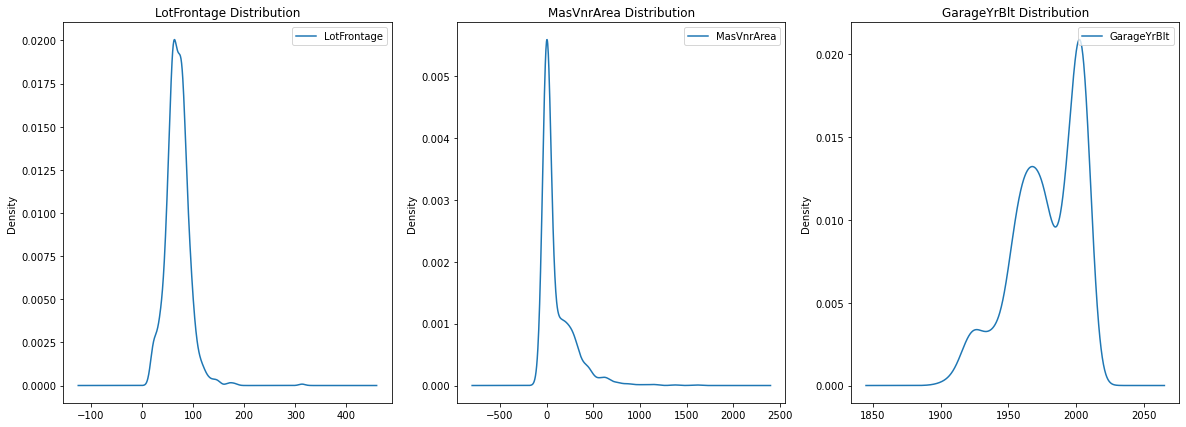

In [38]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train.LotFrontage.plot(kind='kde', ax=ax[0])
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('LotFrontage Distribution')
ax[0].legend(loc="upper right")

X_train.MasVnrArea.plot(kind='kde', ax=ax[1])
lines, labels = ax[1].get_legend_handles_labels()
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('MasVnrArea Distribution')
ax[1].legend(loc="upper right")

X_train.GarageYrBlt.plot(kind='kde', ax=ax[2])
lines, labels = ax[2].get_legend_handles_labels()
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('GarageYrBlt Distribution')
ax[2].legend(loc="upper right")

print('Skewness - LotFrontage : ', X_train.LotFrontage.skew())
print('Skewness - MasVnrArea  : ', X_train.MasVnrArea.skew())
print('Skewness - GarageYrBlt : ', X_train.GarageYrBlt.skew())

Kami mengamati berdasarkan visualisasi atau nilai skewness bahwa **semua variabel dengan nilai yang hilang memiliki distribusi skewed**. Jadi, kita akan menggunakan Median bukan Mean.

In [39]:
# Function to Filling Missing Values with Median and 0/1

def impute_na(df, variable, median):
  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  df[variable].fillna(median, inplace=True)

  return df

In [40]:
# Display Median Value for Variables that have Missing Values

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [41]:
# Impute Missing Values
X_train = impute_na(X_train, 'LotFrontage', X_train['LotFrontage'].median())
X_train = impute_na(X_train, 'MasVnrArea', X_train['MasVnrArea'].median())
X_train = impute_na(X_train, 'GarageYrBlt', X_train['GarageYrBlt'].median())

X_test = impute_na(X_test, 'LotFrontage', X_test['LotFrontage'].median())
X_test = impute_na(X_test, 'MasVnrArea', X_test['MasVnrArea'].median())
X_test = impute_na(X_test, 'GarageYrBlt', X_test['GarageYrBlt'].median())

X_train.head(15)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
64,7,1057,1057,2034,576,318,69.0,573.0,1998.0,219500,1,0,0
682,6,1291,1291,1291,307,288,69.0,0.0,1996.0,173000,1,0,0
960,5,858,858,858,117,162,50.0,0.0,1979.0,116500,0,0,1
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000,0,0,0
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000,0,0,0
416,6,672,672,1400,0,463,74.0,203.0,1978.0,149500,0,0,0
1034,5,920,954,954,0,920,50.0,0.0,1938.0,119750,0,0,0
853,6,1127,1445,1445,180,563,69.0,115.0,1964.0,158000,1,0,0
472,6,547,1072,1072,0,88,35.0,80.0,2005.0,148000,0,0,0
1011,5,0,1664,1664,0,0,75.0,0.0,1979.0,100000,0,0,1


In [42]:
# Define List of Columns with 0/1 Imputation

cols_with_na = list(X_train.columns)
cols_with_na.remove('SalePrice')

print('Default Column            : ', cols_to_use)
print('All Columns in X_train    : ', list(X_train.columns))
print('Final Column for Training : ', cols_with_na)

Default Column            :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
All Columns in X_train    :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']
Final Column for Training :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']


In [43]:
# Standarize Dataset

## With Median Imputation and Without 0/1 Imputation
scaler = StandardScaler()
X_train_no_na = scaler.fit_transform(X_train[cols_to_use])
X_test_no_na = scaler.transform(X_test[cols_to_use])

## With Median Imputation and With 0/1 Imputation
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train[cols_with_na])
X_test_all = scaler.transform(X_test[cols_with_na])

---
Kami akan membuat model menggunakan Regresi Linier untuk menyelesaikan masalah Harga Rumah ini.

In [44]:
# Let's Compare the Performance of Linear Regression filled with Median vs Median + 0/1

linreg = LinearRegression()
linreg.fit(X_train_no_na, y_train)
pred_train_no_na = linreg.predict(X_train_no_na)
pred_test_no_na = linreg.predict(X_test_no_na)

print('Using Median Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_no_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_no_na)))
print('')

linreg = LinearRegression()
linreg.fit(X_train_all, y_train)
pred_train_with_na = linreg.predict(X_train_all)
pred_test_with_na = linreg.predict(X_test_all)

print('Using Median + 0/1 Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_with_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_with_na)))
print('')

## Calculate Differences between `Median + 0/1 Imputation` and `Median Imputation`
diff = mean_squared_error(y_test, pred_test_no_na) - mean_squared_error(y_test, pred_test_with_na)
print('Differences : ', diff)

Using Median Imputation
MSE - Train : 1161895545.483203
MSE - Test  : 2213352533.0368657

Using Median + 0/1 Imputation
MSE - Train : 1157194541.9444427
MSE - Test  : 2198183078.1270666

Differences :  15169454.909799099


Di sini, ketika kami membangun model menggunakan variabel tambahan untuk menangkap data yang hilang, kami mengamati:
* Di set tes, MSE lebih kecil.
  
   Ini berarti bahwa perbedaan antara nilai nyata dan nilai perkiraan lebih kecil, dan dengan demikian model kami berkinerja lebih baik.

* Ada perbedaan ~14 juta antara model yang menggantikan median dan model yang menggunakan imputasi median dalam kombinasi dengan variabel tambahan untuk menangkap kekurangan.

   Jadi, meskipun perbedaan UMK terlihat kecil, jika kita meringkasnya menjadi nilai bisnis, dampaknya sangat besar.

---
### Suggestions

Typically, **Mean/Median Imputation is done together with adding a variable to capture those observations where the data was missing**, thus covering 2 angles: if the data was Missing Completely At Random, this would be contemplated by the Mean/Median Imputation, and if it wasn't this would be captured by the additional variable.

## A.8. Arbitrary Value Imputation

### Penjelasan

Jika nilai yang hilang bukan MCAR, kita dapat menggunakan beberapa metode di bawah ini:

* **Menambahkan variabel biner tambahan** untuk menunjukkan apakah nilainya hilang (`1`) atau tidak (`0`).

* **Mengganti NA dengan nilai**
  - Terkadang nilai ini berada di ujung distribusi
  - Metode ini digunakan di beberapa kompetisi Kaggle.
  - Ini terdiri dari mengganti NA dengan nilai yang berubah-ubah. Setiap kreasi Anda, tetapi idealnya berbeda dari median/mean/mode.

**Keuntungan :**
* Mudah diimplementasikan.
* Menangkap pentingnya kehilangan jika ada.

**Kekurangan :**
* Mendistorsi distribusi asli variabel.
* Jika missess tidak penting, mungkin menutupi kekuatan prediksi dari variabel asli dengan mendistorsi distribusinya.
* Sulit untuk memutuskan nilai mana yang akan digunakan.
 Jika nilainya di luar distribusi, itu mungkin menutupi atau membuat outlier

Ketika variabel ditangkap oleh pihak ketiga, seperti agen kredit, mereka sudah menempatkan nomor arbitrer untuk menandakan hilangnya ini. Jadi, terkadang teknik ini adalah **praktik umum dalam pengumpulan data kehidupan nyata**.

### Studi kasus

In [46]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [47]:
# Function to Filling Missing Values with Zeroes, Hundreds, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_hundred'] = df[variable].fillna(100)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [48]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,24.0,0


In [49]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_hundred.fit(X_train_titanic[['Age_hundred', 'Fare']], y_train_titanic)

pred_hundred_train = rf_hundred.predict_proba(X_train_titanic[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test_titanic[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc. : 0.740654761904762

Using hundred imputation
Train - Random Forests roc-auc : 0.7543491464393397
Test - Random Forests roc-auc. : 0.7628273809523809

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc. : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc. : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc. : 0.7614880952380954



Kesimpulan (berdasarkan perspektif pribadi):
* Kita dapat melihat bahwa mengganti NA dengan `100` membuat model berperforma lebih baik daripada mengganti NA dengan `0`.
* Ini karena anak-anak lebih mungkin untuk bertahan hidup daripada orang dewasa.
* Mengisi NA dengan nol, mendistorsi hubungan ini dan membuat model kehilangan daya prediksi.


### Saran

Nilai arbitrer harus ditentukan untuk setiap variabel secara spesifik. Misalnya, untuk kumpulan data ini, pilihan untuk **mengganti NA di `Usia` dengan `0` atau `100` adalah valid, karena tidak satu pun dari nilai tersebut yang sering muncul dalam distribusi asli variabel, dan nilai tersebut terletak di ekor distribusi.**

Namun, jika kita mengganti NA di `Tarif`, nilai tersebut tidak lagi bagus, karena kita dapat melihat bahwa `Tarif` dapat mengambil nilai hingga `500`. Jadi kami mungkin ingin mempertimbangkan untuk menggunakan `500` atau `1000` untuk menggantikan NA, bukan `100`.

**Seperti yang Anda lihat, ini benar-benar arbitrer, namun digunakan di industri.** Nilai umum yang dipilih oleh perusahaan adalah -9999 atau 9999, atau serupa.

# B. Kesimpulan dari Missing Values

## Metode imputasi nilai hilang mana yang harus saya gunakan dan kapan?

Tidak ada jawaban langsung untuk pertanyaan ini, dan metode mana yang digunakan pada kesempatan yang tidak ditetapkan di atas batu. **Ini sepenuhnya terserah Anda**.

Metode yang berbeda membuat asumsi yang berbeda dan memiliki kelebihan dan kekurangan yang berbeda.

## Pedoman

* Cek mekanisme data yang hilang :
  - MCAR:
    * Analisis Kasus Lengkap,
    * Mean Imputaion (variabel numerik dengan Distribusi Gaussian/Normal),
    * Median Impuation (variabel numerik dengan distribusi miring)
    * Mode Imputasi (variabel kategoris)
    * Tambahkan Imputasi Label yang Hilang (variabel kategoris)
    * Imputasi Sampel Acak
    * Imputasi Nilai Arbitrase
  - MAR, MNAR :
    * Tambahkan 0/1 Imputasi
    * Imputasi Nilai Arbitrase
    * Tambahkan Imputasi Label yang Hilang (variabel kategoris)
    * Anda dapat menggabungkannya dengan Imputasi Rata-Rata/Median/Mode
* Jika nilai yang hilang terlalu kecil: Analisis Kasus Lengkap
* Jika nilai yang hilang kurang dari 5% dari variabel :
  - Berarti Imputasi
  - Imputasi Median
  - Modus Imputasi
  - Imputasi Sampel Acak
* Jika nilai yang hilang lebih dari 5% dari variabel:
  - Imputasi Rata-Rata/Median/Mode + menambahkan Imputasi 0/1
  - Tambahkan Imputasi Label yang Hilang (variabel kategoris)

Jika jumlah NA dalam suatu variabel kecil, kecil kemungkinannya akan berdampak kuat pada variabel/target yang Anda coba prediksi. Oleh karena itu, memperlakukan mereka secara khusus, pasti akan menambah kebisingan pada variabel. Oleh karena itu, akan lebih berguna untuk mengganti dengan mean/sampel acak untuk mempertahankan distribusi variabel.

Jika variabel / target yang Anda coba prediksi sangat tidak seimbang, maka mungkin jumlah NA yang kecil ini memang informatif. Anda harus memeriksa ini.


---
## Catatan Akhir

Imputasi NA untuk kompetisi data dan pengaturan bisnis dapat didekati secara berbeda. **Dalam kompetisi data, sedikit peningkatan performa dapat menjadi perbedaan antara posisi pertama atau kedua.** Oleh karena itu, Anda mungkin ingin **mencoba semua metode rekayasa fitur** dan menggunakan salah satu yang memberikan model pembelajaran mesin terbaik pertunjukan. Mungkin saja metode imputasi NA yang berbeda membantu model yang berbeda membuat prediksi yang lebih baik.

Dalam skenario bisnis, ilmuwan **biasanya tidak memiliki waktu untuk melakukan studi yang panjang**, dan oleh karena itu dapat memilih untuk merampingkan prosedur rekayasa fitur. Dalam kasus ini, merupakan praktik umum untuk mengikuti panduan di atas, dengan mempertimbangkan pengecualian, dan melakukan pemrosesan yang sama untuk semua fitur.

Pra-pemrosesan yang disederhanakan ini mungkin tidak menghasilkan fitur yang paling prediktif, namun membuat rekayasa fitur dan model pembelajaran mesin terkirim jauh lebih cepat. Dengan demikian, bisnis dapat mulai menikmati kekuatan pembelajaran mesin lebih cepat.